In [1]:
from PolynomialModel import PolynomialModel
import matplotlib.pyplot as plt
import numpy as np

N_Epoch = 10
N_Train = 4000              # 1000 lead to overfitting
Sigma = 0.1                 # Do not have too sparse data

2024-05-17 15:25:52.716563: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-17 15:25:52.720099: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 15:25:52.989358: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 15:25:54.178243: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 15:25:56.486887: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Start by determining the best NN activation method, using a single layer of 30 neurons (works better than 100 neurons?). Keep epochs low so we can have a fast running code.

/home/yggdrasil/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Completed 1/6
Completed 2/6
Completed 3/6
Completed 4/6
Completed 5/6
Completed 6/6


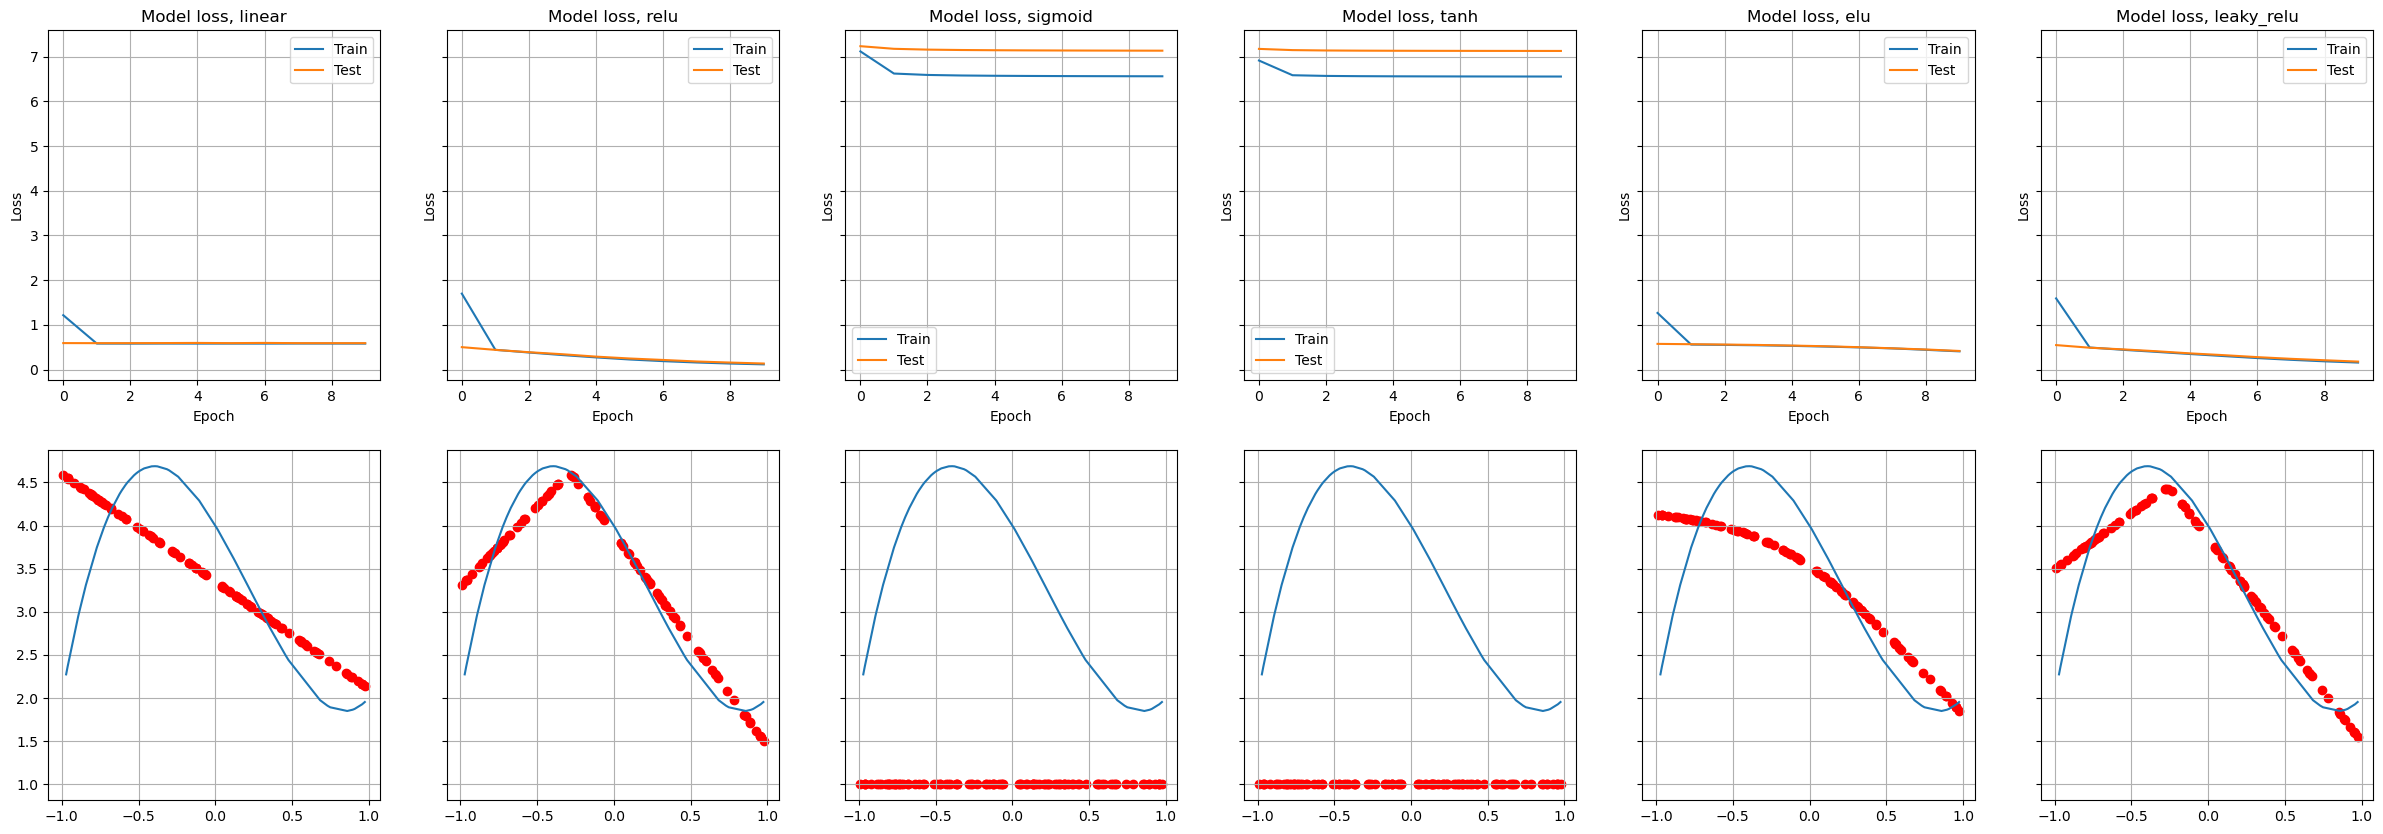

In [2]:
Activations = ['linear', 'relu', 'sigmoid', 'tanh', 'elu', 'leaky_relu']

figure, ax = plt.subplots(2, len(Activations), sharey = 'row')
figure.set_size_inches(30, 10)

for idx, activation in enumerate(Activations):

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, 1, [30], 'sgd', 'mse', activation, False)
    PM.TrainModel()

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title('Model loss, {}'.format(activation))
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    np.random.seed(0)  
    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r')
    predict_ax.plot(PM.x_valid, PM.y_target)
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(Activations)))


Best results are given by relu and leaky relu, and maybe elu => use one of this activation functions from now on. I tried using relu but the network was really prone to dying (output identically zero, https://datascience.stackexchange.com/questions/5706/what-is-the-dying-relu-problem-in-neural-networks) => I then decided to switch to leaky_relu (similar results, but the network never died).

Try changing optimizer using one of previously determined activations

Completed 1/6
Completed 2/6
Completed 3/6
Completed 4/6
Completed 5/6
Completed 6/6


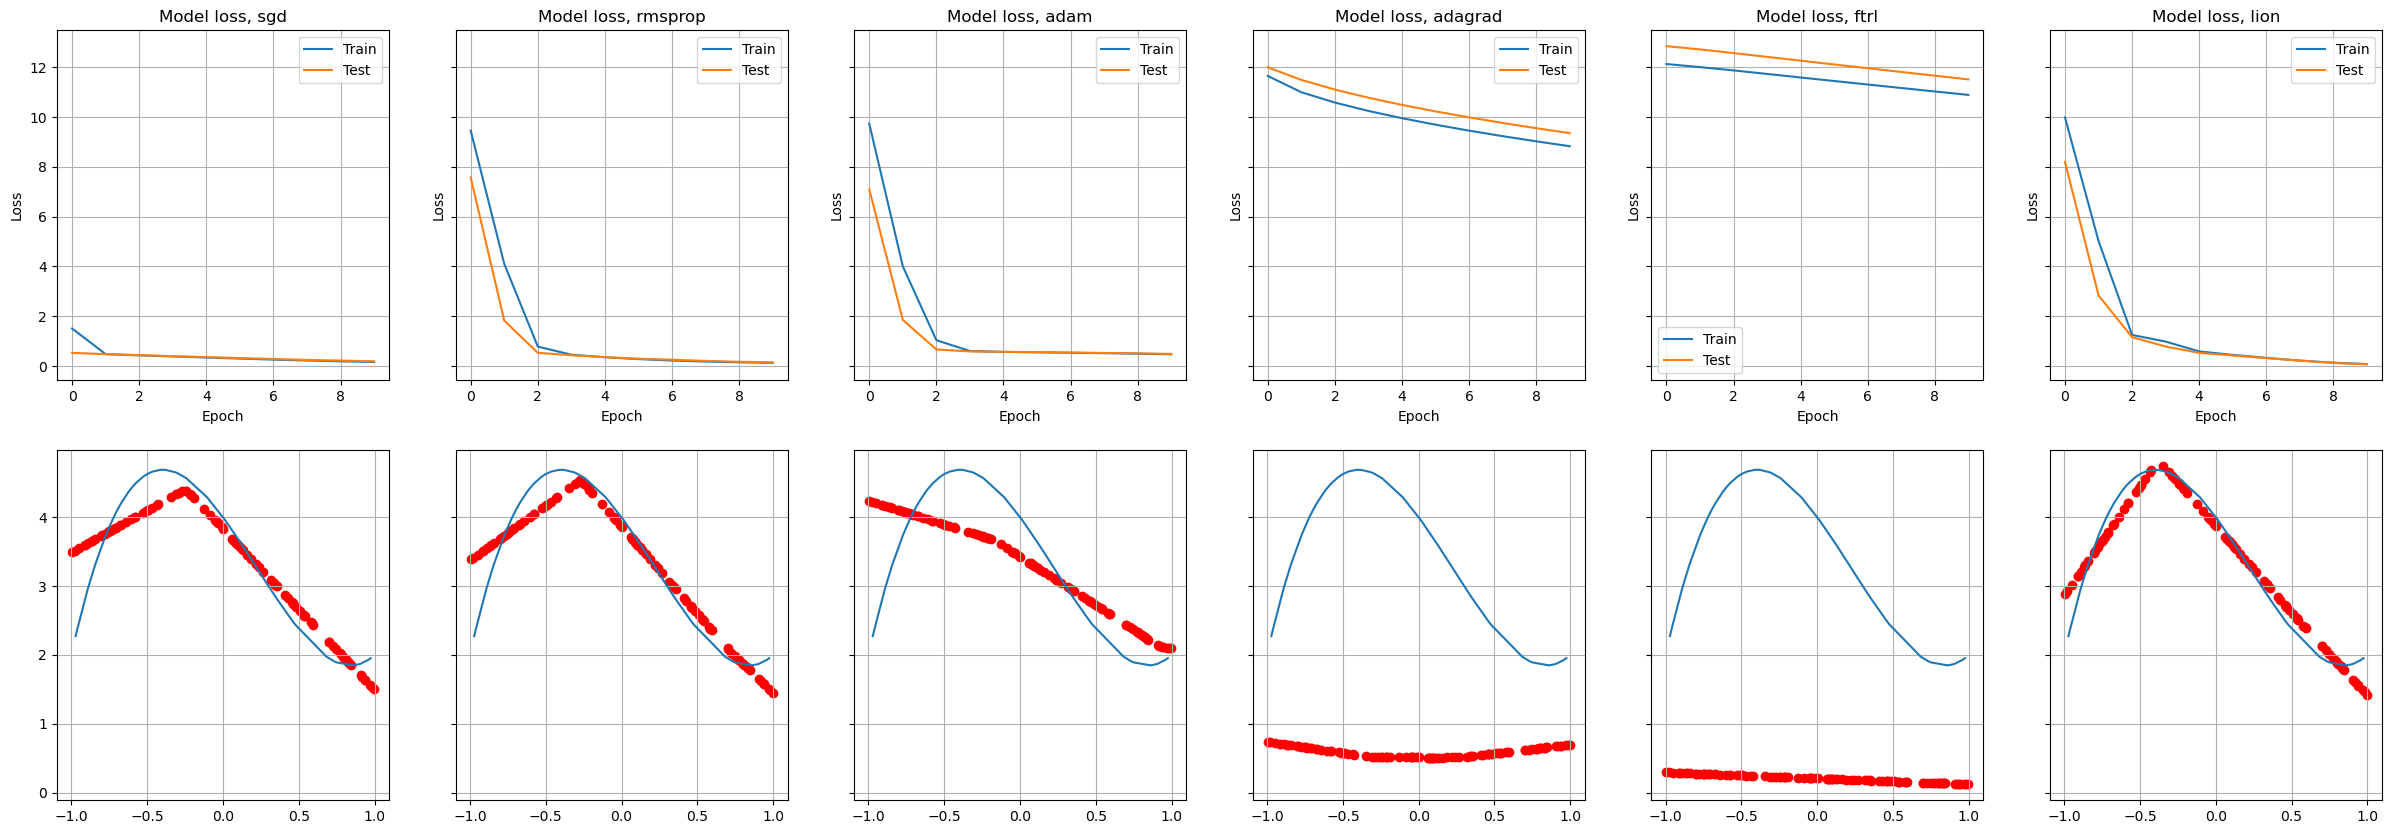

In [18]:
Optimizers = ['sgd', 'rmsprop', 'adam', 'adagrad', 'ftrl', 'lion']

figure, ax = plt.subplots(2, len(Optimizers), sharey = 'row')
figure.set_size_inches(30, 10)

for idx, optimizer in enumerate(Optimizers):

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, 1, [30], optimizer, 'mse', 'leaky_relu', False)
    PM.TrainModel()

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title('Model loss, {}'.format(optimizer))
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r')
    predict_ax.plot(PM.x_valid, PM.y_target)
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(Optimizers)))

sgd, rmsprop, lion are the best optimizers. The overall better results are obtained with sgd or rmsprop. I will use rmsprop from now on.

Completed 1/6
Completed 2/6
Completed 3/6
Completed 4/6
Completed 5/6
Completed 6/6


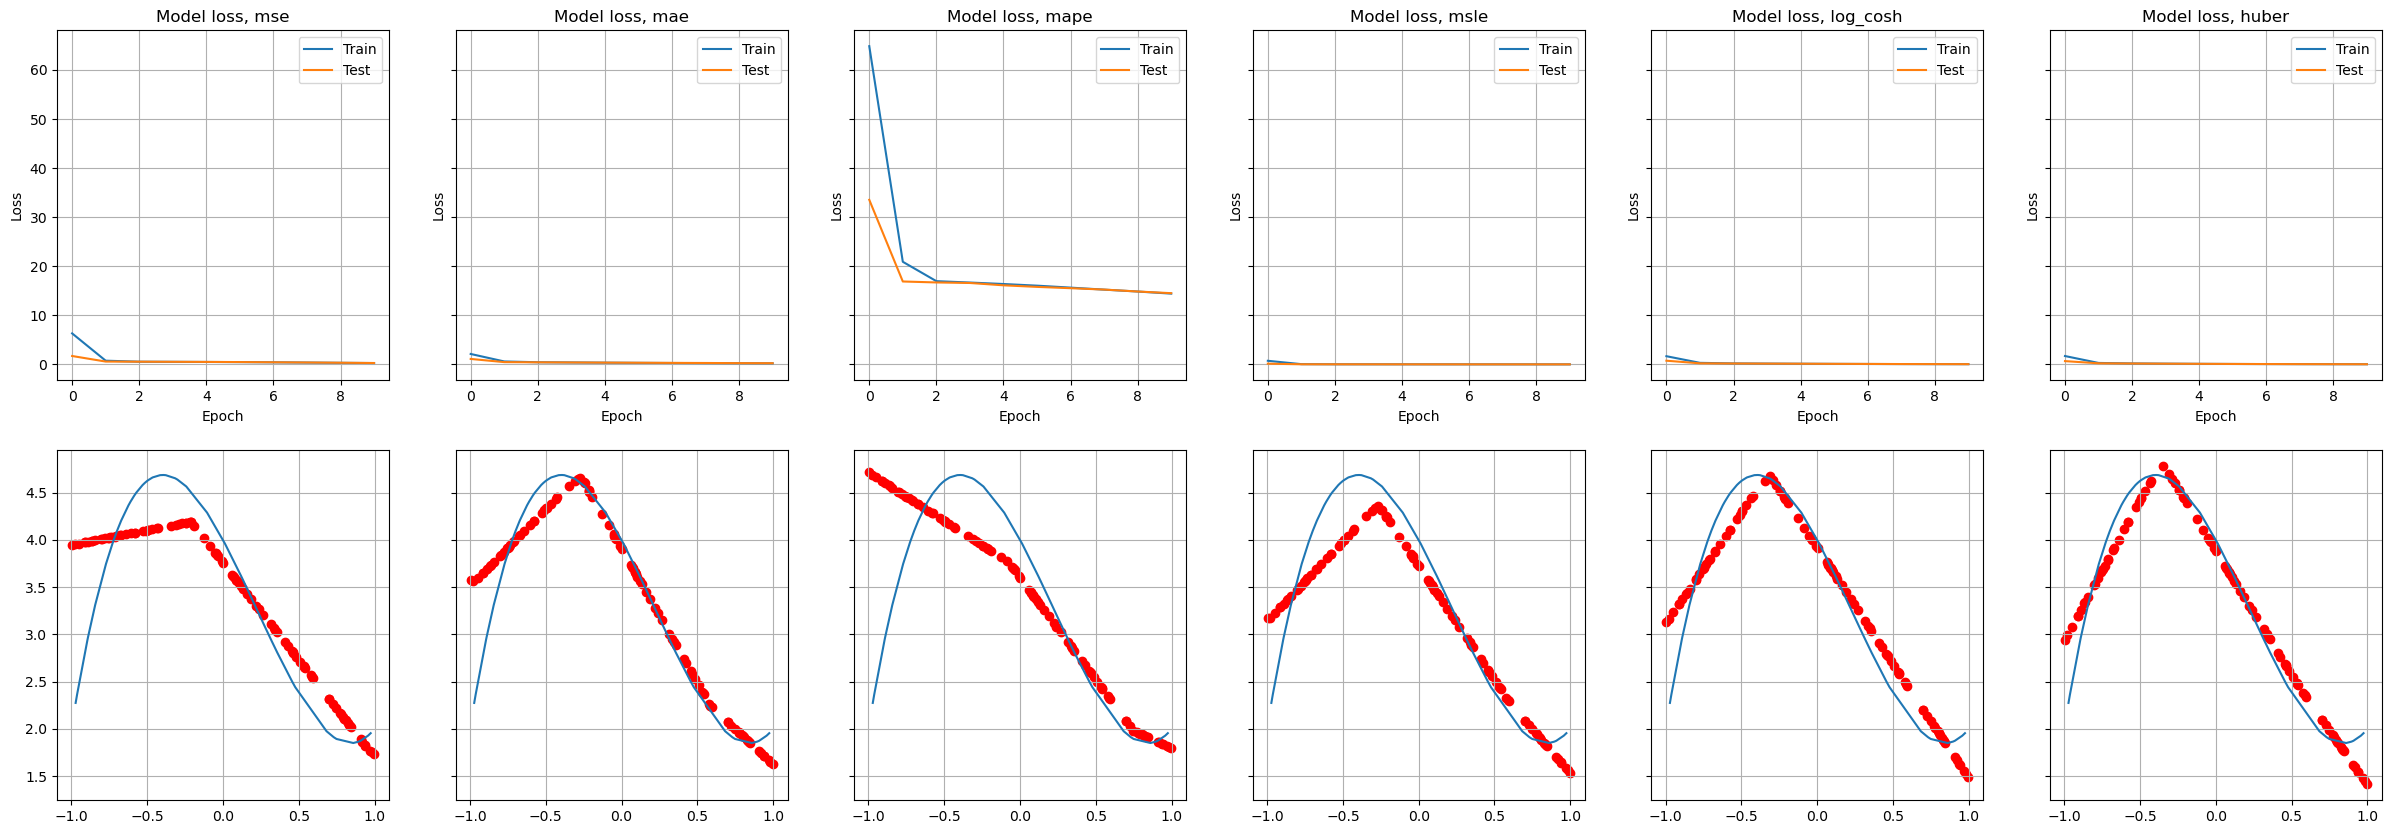

In [23]:
Losses = ['mse', 'mae', 'mape', 'msle', 'log_cosh', 'huber']

figure, ax = plt.subplots(2, len(Losses), sharey = 'row')
figure.set_size_inches(30, 10)

for idx, loss in enumerate(Losses):

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, 1, [100], 'rmsprop', loss, 'leaky_relu', False)
    PM.TrainModel()

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title('Model loss, {}'.format(loss))
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r')
    predict_ax.plot(PM.x_valid, PM.y_target)
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(Losses)))

I had to increase the number of neurons to 100 to properly evaluate the loss function, otherwise the result was too bad. mse, mae, log_cosh give good results => I will use mae from now on.

Try different NN depths, keeping the umber of neurons roughly constant

Completed 1/4
Completed 2/4
Completed 3/4
Completed 4/4


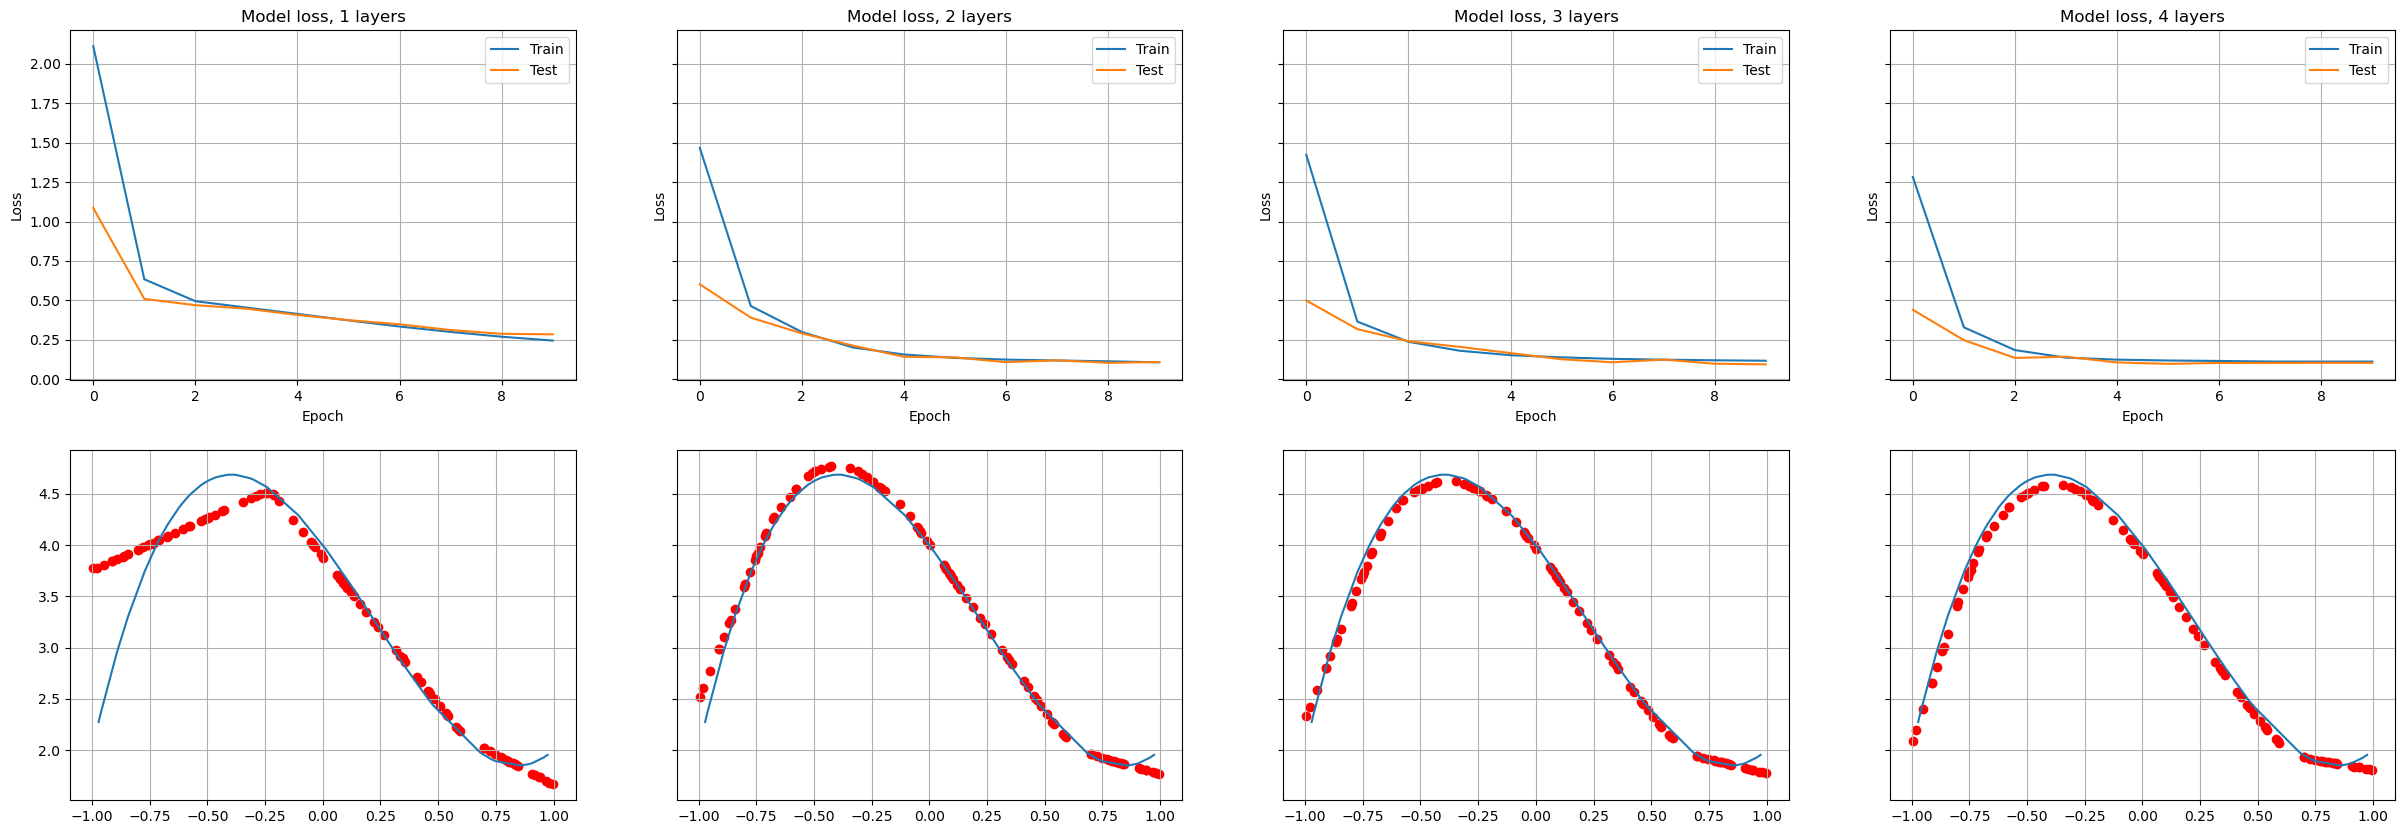

In [24]:
N_Layers = [1, 2, 3, 4]
Shapes = [[100], [50, 50], [30, 30, 30], [25, 25, 25, 25]]

figure, ax = plt.subplots(2, len(N_Layers), sharey = 'row')
figure.set_size_inches(30, 10)

for idx, N_Layer in enumerate(N_Layers):

    PM = PolynomialModel(N_Epoch, N_Train, Sigma, N_Layer, Shapes[idx], 'rmsprop', 'mae', 'leaky_relu', False)
    PM.TrainModel()

    loss_ax = ax[0][idx]
    predict_ax = ax[1][idx]

    # look into training history
    # Plot training & validation loss values
    loss_ax.plot(PM.history.history['loss'])
    loss_ax.plot(PM.history.history['val_loss'])
    loss_ax.set_title('Model loss, {} layers'.format(N_Layer))
    loss_ax.set_ylabel('Loss')
    loss_ax.set_xlabel('Epoch')
    loss_ax.legend(['Train', 'Test'], loc='best')
    loss_ax.grid(True)

    x_predicted = np.random.uniform(-1, 1, 100)
    y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
    predict_ax.scatter(x_predicted, y_predicted,color='r')
    predict_ax.plot(PM.x_valid, PM.y_target)
    predict_ax.grid(True)

    print('Completed {}/{}'.format(idx + 1, len(N_Layers)))

Best results are obtained for a higher numer of neurons (here 100) and an higher number of layers => best result given by 3/4 layers and 100 neurons

Fine tune layer parameters => best result for [50, 20, 20, 10] => train for an highr number of epochs

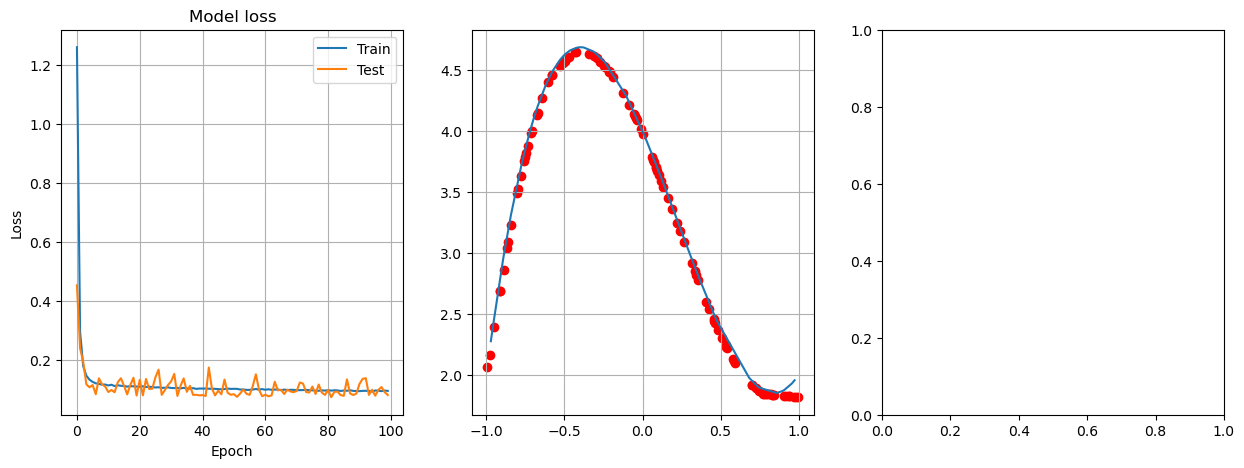

In [32]:
N_Layer = 4
Shape = [50, 20, 20, 10]        
N_Epochs_Final = 100        

figure, ax = plt.subplots(1, 3)
figure.set_size_inches(15, 5)

PM = PolynomialModel(N_Epochs_Final, N_Train, Sigma, N_Layer, Shape, 'rmsprop', 'mae', 'leaky_relu', False)
PM.TrainModel()

loss_ax = ax[0]
predict_ax = ax[1]

# look into training history
# Plot training & validation loss values
loss_ax.plot(PM.history.history['loss'])
loss_ax.plot(PM.history.history['val_loss'])
loss_ax.set_title('Model loss')
loss_ax.set_ylabel('Loss')
loss_ax.set_xlabel('Epoch')
loss_ax.legend(['Train', 'Test'], loc='best')
loss_ax.grid(True)

x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
predict_ax.scatter(x_predicted, y_predicted,color='r')
predict_ax.plot(PM.x_valid, PM.y_target)
predict_ax.grid(True)

Try to predict data outside range

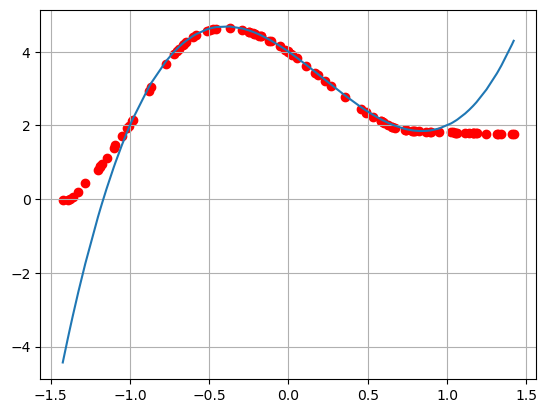

In [33]:
x_predicted = np.sort(np.random.uniform(-1.5, 1.5, 100))
y_predicted = PM.model.predict(x_predicted, verbose = PM.verbose)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_predicted, PM.TP(x_predicted))
plt.grid(True)
plt.show()